### The problem

Consider the following poisson's equation:
$$
\frac{\partial u}{\partial t} = f + \nabla^{2} u
$$
defined over $\Omega \times (0,T]$.

The problem is first order in time, so we given a single initial condition:
$$
u(t=0) = u_{0}
$$

Also supply the boundary conditions
$$
u = u_{D}
$$

We use a semi-discrete method. From the Euler family, let's choose $\alpha = 1$ for the backwards Euler method. 

This has the infinite dimensional weak form:
$$
\int_{\Omega} \left(u_{n+1}v_{n+1} + \Delta t \nabla u_{n+1} \cdot \nabla v_{n+1}\right)\,dS = \int_{\Omega} \left(u_{n} + \Delta t f_{n+1}\right) v_{n+1}\,dS
$$

Concisely written as 
$$
a(u_{n+1},v_{n+1}) = L(v_{n+1}; u_{n}) 
$$

#### Test problem 1: known solution
Our time integration scheme is ``exact" for linear variations in time. So let's make us a solution that is quadratic in space, and linear in time.
$$
u = 1 + x^{2} + \alpha y^{2} + \beta t 
$$

We can compute
$$
\frac{\partial u}{\partial t} = \beta
$$
and
$$
\nabla^{2} u = 2 + 2\alpha
$$
thus the forcing term must be 
$$
f = \beta - 2 - 2\alpha
$$

We can simply the boundary condition and the initial condition to be as defined by $u = 1 + x^{2} + \alpha y^{2} + \beta t$.

In [1]:
import numpy as np
from fenics import *

In [2]:
# start time
t0 = 0.0
# final time
T = 2.0 
num_steps = 20
# time steps
Dt = T / num_steps
# forcing function parameters
beta = 1.2
alpha = 3

In [3]:
mesh = UnitSquareMesh(8,8)
V = FunctionSpace(mesh, "CG", 2)

In [4]:
"""
We first define our exact solution. Alpha, beta, t
are given
"""
"""
When we want to update t, we can call 

u_D.t
"""

u_D = Expression(
    "1 + pow(x[0], 2) + alpha*pow(x[1], 2) + beta*t",
    degree = 2,
    alpha = alpha,
    beta = beta,
    t = t0
    )

In [5]:

"""
express u0 in terms of basis functions

project works also. But interpolate makes sure that the dofs
are exact to within machin precision for the initial condition
"""
u_n = interpolate(u_D, V)
# u_n = project(u_D, V)

# trial solution
u = TrialFunction(V)
# weighting functions
v = TestFunction(V)

# define forcing
f = Constant(beta - 2 - 2*alpha)

In [6]:
def boundary(x, on_boundary):
    return on_boundary

# pass the function space, generating expression, and boundary checker
bc = DirichletBC(V, u_D, boundary)

In [7]:
a = u*v*dx + Dt*dot(grad(u), grad(v))*dx
L = v*(u_n + Dt*f)*dx

t = 0.10: error = 2.31e-14
t = 0.20: error = 3.15e-14
t = 0.30: error = 3.51e-14
t = 0.40: error = 3.77e-14
t = 0.50: error = 3.95e-14
t = 0.60: error = 4.09e-14
t = 0.70: error = 4.31e-14
t = 0.80: error = 4.49e-14
t = 0.90: error = 4.62e-14
t = 1.00: error = 4.66e-14
t = 1.10: error = 4.88e-14
t = 1.20: error = 5.06e-14
t = 1.30: error = 5.24e-14
t = 1.40: error = 5.42e-14
t = 1.50: error = 5.68e-14
t = 1.60: error = 5.77e-14
t = 1.70: error = 5.86e-14
t = 1.80: error = 5.95e-14
t = 1.90: error = 6.22e-14
t = 2.00: error = 6.31e-14


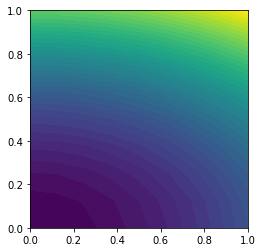

In [8]:
# reassign the variable u to be the solution
u = Function(V)
t = t0
vtkfile = File("Case1/heatconduct.pvd")
for n in range(num_steps):

    t += Dt
    u_D.t = t

    solve(a == L, u, bc)

    vtkfile << (u, t)
    
    plot(u)
    # compute error at vertices
    u_e = interpolate(u_D, V)
    error = np.abs(np.array(u_e.vector()) - np.array(u.vector())).max()
    print("t = %.2f: error = %.3g" % (t, error))
    # Update previous solution
    u_n.assign(u)
